**Objectives**

In this notebook, we will :

1. Use machine learning algorithms to predict whether a student’s academic performance is affected by their sleep patterns and related factors.
2. Compare the five learning algorithms
3. Determine which factors related to sleep patterns and student behavior most significantly impact academic performance.
4. Find the best algorithm with high accuracy

We will be using three learning algorithms:
1. Logistic Regression
2. Support Vector Machine
3. K-Nearest Neighbors
4. Naive Bayes
5. Random Forest

**Reading data**

In [ ]:
#Import Required Libraries and Load Dataset

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
df = pd.read_csv('student_sleep_academic_performance.csv')
dfv = pd.read_csv('student_sleep_academic_performance.csv')

**Data**

Before process the dataset let's describe it briefly:

**Fields in the Dataset**
1. S. No: Serial number of the entry.
2. Age: Age of the student.
3. Gender: Gender of the student (Male, Female, Non-Binary, Prefer not to say).
4. Field of Study: Field of study (e.g., Engineering, Arts, Science).
5. Average Sleep Hours: Average number of sleep hours per night (numeric, e.g., 6.5).
6. Bedtime on Weekdays: Typical bedtime on weekdays (e.g., 10:30 PM).
7. Wake Time on Weekdays: Typical wake time on weekdays (e.g., 6:30 AM).
8. Consistent Sleep Schedule: Whether the student has a consistent sleep schedule (Yes/No).
9. Naps During the Day: Whether the student takes naps during the day (Yes/No).
10. Quality of Sleep: Subjective quality of sleep (Poor, Fair, Good, Excellent).
11. Difficulties Falling Asleep: Frequency of difficulties in falling asleep (Never, Sometimes, Often, Always).
12. Waking Up During the Night: Frequency of waking up during the night (Never, Sometimes, Often, Always).
13. Sleep Aids: Use of sleep aids (Normal, Occasionally, Regularly).
14. Current GPA: The student's current GPA (numeric, e.g., 8.5).
15. Academic Performance: Subjective academic performance (Below Average, Average, Above Average, Excellent).
16. Sleepy or Tired During Classes: Frequency of feeling sleepy or tired during classes (Never, Sometimes, Often, Always).
17. Skip Classes Due to Sleep-Related Issues: Whether the student skips classes due to sleep issues (Yes/No).
18. Caffeine Consumption: Daily caffeine consumption (Normal, Low, Moderate, High).
19. Electronic Devices Before Bed: Use of electronic devices before bed (None, Less than 1 hour, 1-2 hours, More than 2 hours).
20. Stress Level Related to Academics: Subjective stress level related to academics (Low, Moderate, High, Very High).
21. Medical Conditions Affecting Sleep: the student has medical conditions affecting sleep (Normal, Mild, Severe).

**Displaying the dataset**

In [ ]:
#Display Dataset
df

,S. No,Age,Gender,Field of Study,Average Sleep Hours,Bedtime on Weekdays,Wake Time on Weekdays,Consistent Sleep Schedule,Naps During the Day,Quality of Sleep,...,Waking Up During the Night,Sleep Aids,Current GPA,Sleepy or Tired During Classes,Skip Classes Due to Sleep-Related Issues,Caffeine Consumption,Electronic Devices Before Bed,Stress Level Related to Academics,Medical Conditions Affecting Sleep,Academic Performance
0,1,19,Female,Engineering,7,11:00 PM,8:00 AM,No,No,Average,...,Sometimes,Occasionally,8.7,Sometimes,Never,Moderate,Yes,Low,Mild,Medium
1,2,21,Female,Business,7,10:00 PM,6:00 AM,Yes,Yes,Poor,...,Sometimes,Occasionally,8.3,Often,Never,Moderate,No,Medium,Normal,Low
2,3,18,Male,Business,6,12:00 AM,7:00 AM,Yes,No,Good,...,Often,Normal,7.9,Often,Often,Normal,No,Medium,Mild,Medium
3,4,18,Male,Arts,7,10:00 PM,6:00 AM,No,Yes,Average,...,Sometimes,Regularly,8.1,Sometimes,Sometimes,Moderate,No,Low,Normal,Medium
4,5,21,Male,Engineering,9,10:00 PM,6:00 AM,No,Yes,Poor,...,Sometimes,Normal,8.5,Sometimes,Never,Moderate,Yes,High,Mild,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
562,563,21,Male,Business,6,12:00 AM,7:00 AM,Yes,Yes,Good,...,Never,Regularly,7.9,Never,Never,Moderate,Yes,High,Normal,Low
563,564,21,Male,Arts,6,10:00 PM,8:00 AM,No,Yes,Good,...,Often,Normal,8.5,Sometimes,Often,Normal,No,Low,Mild,Medium
564,565,21,Male,Business,7,11:00 PM,6:00 AM,Yes,Yes,Good,...,Sometimes,Occasionally,8.6,Sometimes,Never,High,Yes,High,Mild,Low
565,566,18,Female,Engineering,6,11:00 PM,8:00 AM,Yes,Yes,Average,...,Often,Occasionally,7.9,Sometimes,Sometimes,Normal,No,Medium,Normal,Medium


In [ ]:
#Check for Missing Values
df.isnull().sum()

,0
S. No,0
Age,0
Gender,0
Field of Study,0
Average Sleep Hours,0
Bedtime on Weekdays,0
Wake Time on Weekdays,0
Consistent Sleep Schedule,0
Naps During the Day,0
Quality of Sleep,0


In [ ]:
#Display Dataset Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567 entries, 0 to 566
Data columns (total 21 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   S. No                                     567 non-null    int64  
 1   Age                                       567 non-null    int64  
 2   Gender                                    567 non-null    object 
 3   Field of Study                            567 non-null    object 
 4   Average Sleep Hours                       567 non-null    int64  
 5   Bedtime on Weekdays                       567 non-null    object 
 6   Wake Time on Weekdays                     567 non-null    object 
 7   Consistent Sleep Schedule                 567 non-null    object 
 8   Naps During the Day                       567 non-null    object 
 9   Quality of Sleep                          567 non-null    object 
 10  Difficulties Falling Asleep           

**Feature Scaling**

In [ ]:
#Map Categorical Features to Numerical Values

df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
df['Field of Study'] = df['Field of Study'].map({'Science': 0, 'Arts': 1, 'Engineering': 2, 'Business': 3})
df['Bedtime on Weekdays'] = df['Bedtime on Weekdays'].map({'10:00 PM': 0, '11:00 PM': 1, '12:00 AM': 2})
df['Wake Time on Weekdays'] = df['Wake Time on Weekdays'].map({'6:00 AM': 0, '7:00 AM': 1, '8:00 AM': 2})
df['Consistent Sleep Schedule'] = df['Consistent Sleep Schedule'].map({'Yes': 0, 'No': 1})
df['Naps During the Day'] = df['Naps During the Day'].map({'Yes': 0, 'No': 1})
df['Quality of Sleep'] = df['Quality of Sleep'].map({'Poor': 0, 'Average': 1, 'Good': 2})
df['Difficulties Falling Asleep'] = df['Difficulties Falling Asleep'].map({'Never': 0, 'Sometimes': 1, 'Often': 2})
df['Waking Up During the Night'] = df['Waking Up During the Night'].map({'Never': 0, 'Sometimes': 1, 'Often': 2})
df['Sleep Aids'] = df['Sleep Aids'].map({'Normal': 0, 'Occasionally': 1, 'Regularly': 2})
df['Sleepy or Tired During Classes'] = df['Sleepy or Tired During Classes'].map({'Never': 0, 'Sometimes': 1, 'Often': 2})
df['Skip Classes Due to Sleep-Related Issues'] = df['Skip Classes Due to Sleep-Related Issues'].map({'Never': 0, 'Sometimes': 1, 'Often': 2})
df['Caffeine Consumption'] = df['Caffeine Consumption'].map({'Normal': 0, 'Moderate': 1, 'High': 2})
df['Electronic Devices Before Bed'] = df['Electronic Devices Before Bed'].map({'Yes': 0, 'No': 1})
df['Stress Level Related to Academics'] = df['Stress Level Related to Academics'].map({'Low': 0, 'Medium': 1, 'High': 2})
df['Medical Conditions Affecting Sleep'] = df['Medical Conditions Affecting Sleep'].map({'Normal': 0, 'Mild': 1, 'Severe': 2})
df['Academic Performance'] = df['Academic Performance'].map({'Low': 0, 'Medium': 1, 'High': 2})


In [ ]:
#Display Updated Dataset with Numerical Values
df

,S. No,Age,Gender,Field of Study,Average Sleep Hours,Bedtime on Weekdays,Wake Time on Weekdays,Consistent Sleep Schedule,Naps During the Day,Quality of Sleep,...,Waking Up During the Night,Sleep Aids,Current GPA,Sleepy or Tired During Classes,Skip Classes Due to Sleep-Related Issues,Caffeine Consumption,Electronic Devices Before Bed,Stress Level Related to Academics,Medical Conditions Affecting Sleep,Academic Performance
0,1,19,1,2,7,1,2,1,1,1,...,1,1,8.7,1,0,1,0,0,1,1
1,2,21,1,3,7,0,0,0,0,0,...,1,1,8.3,2,0,1,1,1,0,0
2,3,18,0,3,6,2,1,0,1,2,...,2,0,7.9,2,2,0,1,1,1,1
3,4,18,0,1,7,0,0,1,0,1,...,1,2,8.1,1,1,1,1,0,0,1
4,5,21,0,2,9,0,0,1,0,0,...,1,0,8.5,1,0,1,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
562,563,21,0,3,6,2,1,0,0,2,...,0,2,7.9,0,0,1,0,2,0,0
563,564,21,0,1,6,0,2,1,0,2,...,2,0,8.5,1,2,0,1,0,1,1
564,565,21,0,3,7,1,0,0,0,2,...,1,1,8.6,1,0,2,0,2,1,0
565,566,18,1,2,6,1,2,0,0,1,...,2,1,7.9,1,1,0,1,1,0,1


**Data visualisation**


In [ ]:
#Check Dataset Shape
df.shape

(567, 21)

In [ ]:
#Verify No Missing Values After Mapping
df.isnull().sum()

,0
S. No,0
Age,0
Gender,0
Field of Study,0
Average Sleep Hours,0
Bedtime on Weekdays,0
Wake Time on Weekdays,0
Consistent Sleep Schedule,0
Naps During the Day,0
Quality of Sleep,0


In [ ]:
#List of Dataset Columns
df.columns

Index(['S. No', 'Age', 'Gender', 'Field of Study', 'Average Sleep Hours',
       'Bedtime on Weekdays', 'Wake Time on Weekdays',
       'Consistent Sleep Schedule', 'Naps During the Day', 'Quality of Sleep',
       'Difficulties Falling Asleep', 'Waking Up During the Night',
       'Sleep Aids', 'Current GPA', 'Sleepy or Tired During Classes',
       'Skip Classes Due to Sleep-Related Issues', 'Caffeine Consumption',
       'Electronic Devices Before Bed', 'Stress Level Related to Academics',
       'Medical Conditions Affecting Sleep', 'Academic Performance'],
      dtype='object')

In [ ]:
#Define Feature Set
features = ['Age', 'Gender', 'Field of Study', 'Average Sleep Hours',
            'Bedtime on Weekdays', 'Wake Time on Weekdays',
            'Consistent Sleep Schedule', 'Naps During the Day', 'Quality of Sleep',
            'Difficulties Falling Asleep', 'Waking Up During the Night',
            'Sleep Aids', 'Current GPA', 'Sleepy or Tired During Classes',
            'Skip Classes Due to Sleep-Related Issues', 'Caffeine Consumption',
            'Electronic Devices Before Bed', 'Stress Level Related to Academics',
            'Medical Conditions Affecting Sleep']

In [ ]:
#Count Distribution of Academic Performance
dfv['Academic Performance'].value_counts()

,count
Academic Performance,
Low,383
Medium,174
High,10


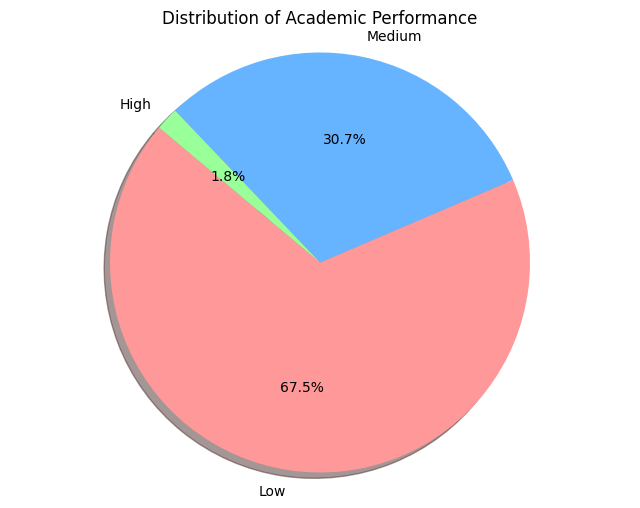

In [ ]:
#Visualize Academic Performance Distribution with a Pie Chart

import matplotlib.pyplot as plt

# Data for the pie chart
labels = ['Low', 'Medium', 'High']
sizes = df['Academic Performance'].value_counts().sort_index().values
colors = ['#ff9999','#66b3ff','#99ff99']

# Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

plt.title('Distribution of Academic Performance')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the pie chart
plt.show()

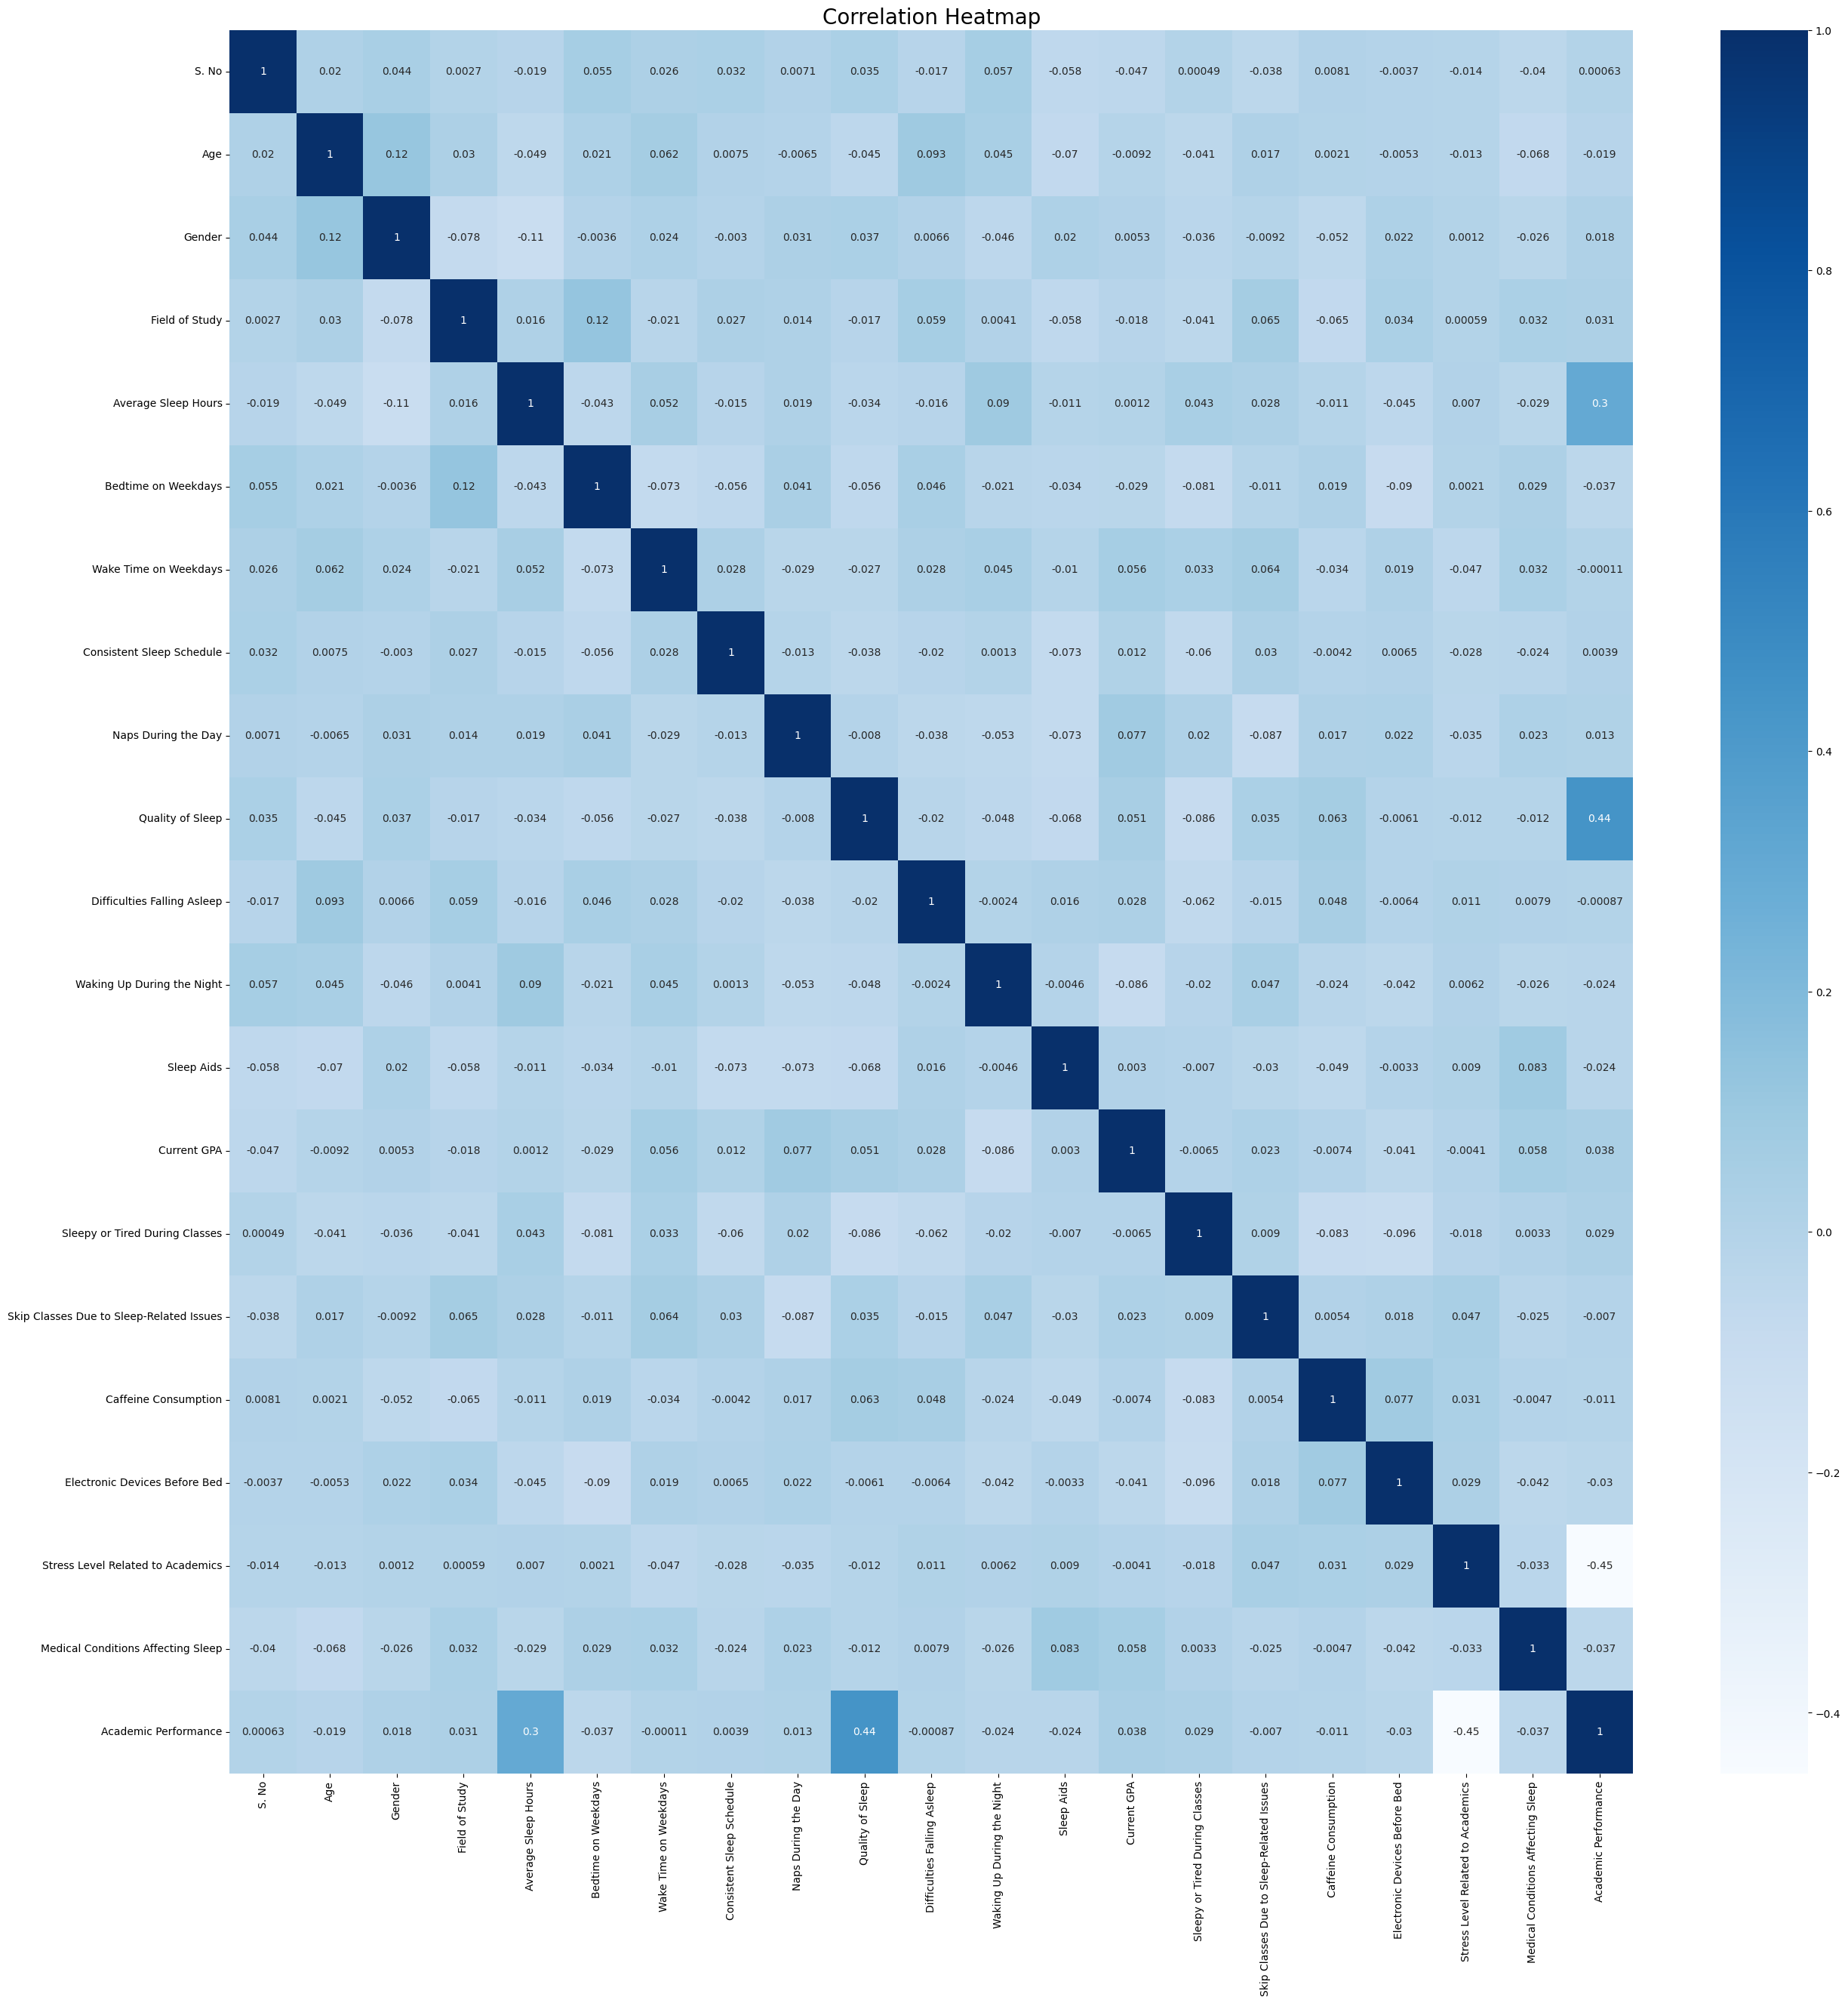

In [ ]:
#Correlation Heatmap of All Variables
import seaborn as sns

# Calculate correlation matrix
corr = df.corr()

# Plot heatmap
plt.figure(figsize=(30, 30))
sns.heatmap(corr, annot=True, cmap="Blues")
plt.title('Correlation Heatmap', fontsize=20)
plt.show()

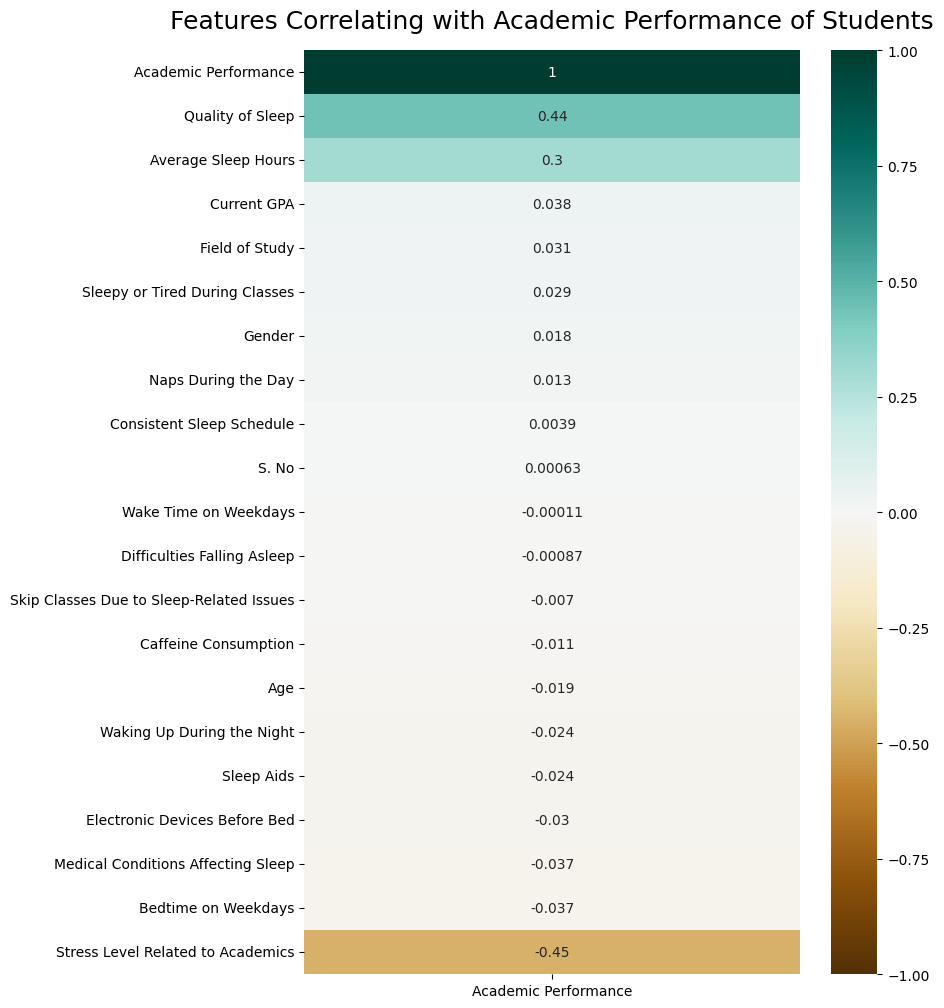

In [ ]:
#Heatmap of Features Correlating with Academic Performance

plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[['Academic Performance']].sort_values(by='Academic Performance', ascending=False),
                      vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Academic Performance of Students',
                  fontdict={'fontsize': 18}, pad=16)
plt.show()

This heatmap visualizes the correlation between various factors and academic performance. Here are some key insights:

1. Quality of Sleep: This has a positive correlation (0.44) with academic performance, suggesting that students who have better quality sleep tend to perform better academically.

2. Average Sleep Hours: There is a moderate positive correlation (0.3) between the number of sleep hours and academic performance. This implies that students who sleep more tend to have better academic outcomes.

3. Stress Level Related to Academics: This has the strongest negative correlation (-0.45) with academic performance. Higher stress levels related to academics are associated with lower academic performance.

4. Other Factors:

      Current GPA has a slight positive correlation (0.038), indicating some degree of alignment with academic performance, but it's not a strong predictor.
      Field of Study, Sleepy or Tired During Classes, and Gender have very low correlations with academic performance, suggesting they are not significant factors in predicting academic outcomes.
      
5. Negatively Correlated Factors:

      Bedtime on Weekdays and Medical Conditions Affecting Sleep show weak negative correlations (-0.037) with academic performance, indicating that earlier bedtimes and fewer medical issues might be slightly beneficial but not significantly so.

In summary, improving sleep quality and managing stress levels related to academics seem to be the most significant factors for enhancing academic performance, while many other factors show minimal impact.








<Figure size 1200x800 with 0 Axes>

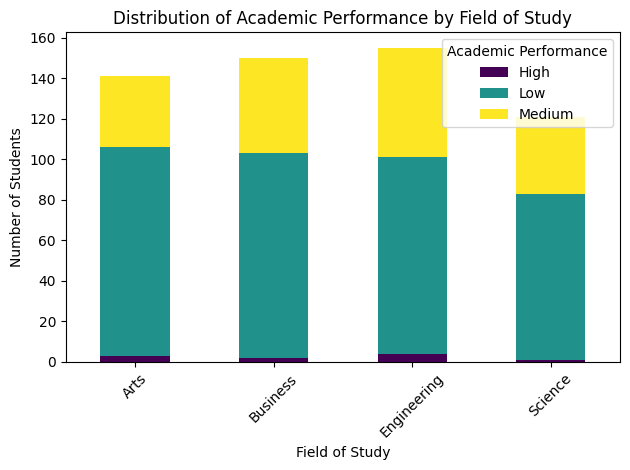

In [ ]:
#Distribution of Academic Performance by Field of Study

# Group by Field of Study and Academic Performance
performance_counts = dfv.groupby(['Field of Study', 'Academic Performance']).size().unstack()

# Plot the distribution
plt.figure(figsize=(12, 8))
performance_counts.plot(kind='bar', stacked=True, colormap='viridis')

plt.title('Distribution of Academic Performance by Field of Study')
plt.xlabel('Field of Study')
plt.ylabel('Number of Students')
plt.legend(title='Academic Performance')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
#Count Distribution of Average Sleep Hours
dfv['Average Sleep Hours'].value_counts()

,count
Average Sleep Hours,
6,203
7,182
5,84
8,80
9,10
4,8


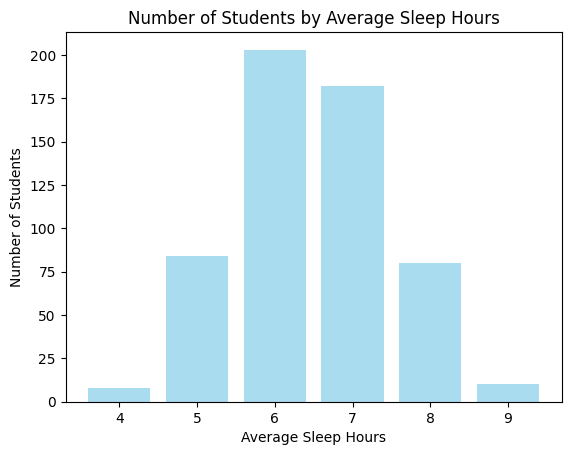

In [ ]:
#Bar Plot of Average Sleep Hours Distribution
# Count the number of students for each average sleep hour
sleep_hour_counts = df['Average Sleep Hours'].value_counts().sort_index()

# Create a bar plot
fig, ax = plt.subplots()
ax.bar(sleep_hour_counts.index, sleep_hour_counts.values, color='skyblue', alpha=0.7)
ax.set_xlabel('Average Sleep Hours')
ax.set_ylabel('Number of Students')
ax.set_title('Number of Students by Average Sleep Hours')

# Ensure all bars are labeled and properly spaced
plt.xticks(sleep_hour_counts.index)

# Show plot
plt.show()

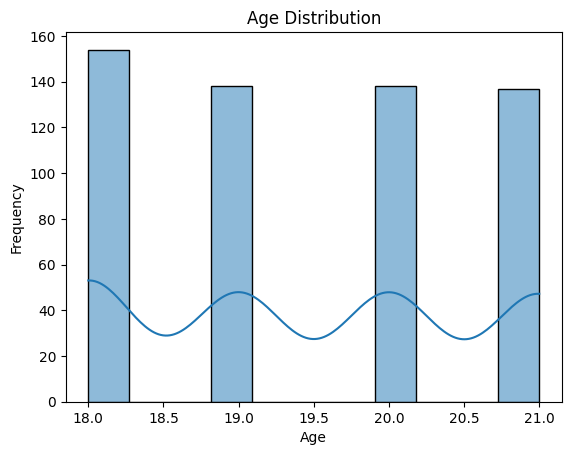

In [ ]:
#Age Distribution with Histogram
sns.histplot(data=dfv, x='Age', kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

<ipython-input-19-0db0f935ee78>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=dfv, x='Average Sleep Hours', y='Current GPA', ci=None, color='red')


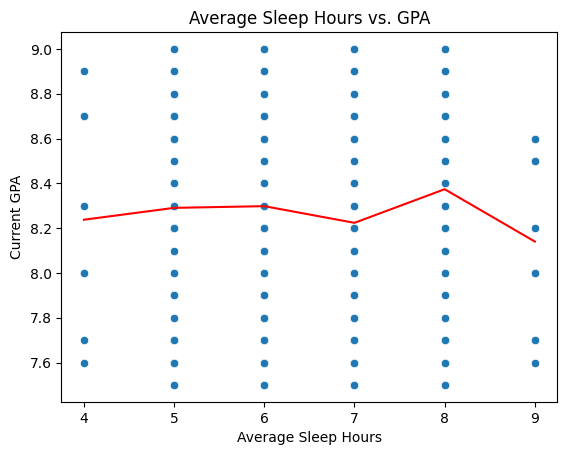

In [ ]:
#Scatter Plot of Average Sleep Hours vs. GPA
sns.scatterplot(data=dfv, x='Average Sleep Hours', y='Current GPA')
sns.lineplot(data=dfv, x='Average Sleep Hours', y='Current GPA', ci=None, color='red')
plt.title('Average Sleep Hours vs. GPA')
plt.xlabel('Average Sleep Hours')
plt.ylabel('Current GPA')
plt.show()

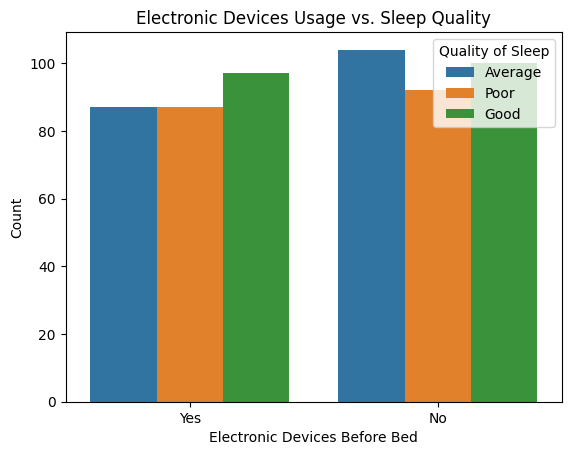

In [ ]:
#Count Plot of Electronic Devices Usage vs. Sleep Quality
sns.countplot(data=dfv, x='Electronic Devices Before Bed', hue='Quality of Sleep')
plt.title('Electronic Devices Usage vs. Sleep Quality')
plt.xlabel('Electronic Devices Before Bed')
plt.ylabel('Count')
plt.show()

<ipython-input-21-9cc61051f84b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dfv, x='Academic Performance', y='Average Sleep Hours', palette='Set3')


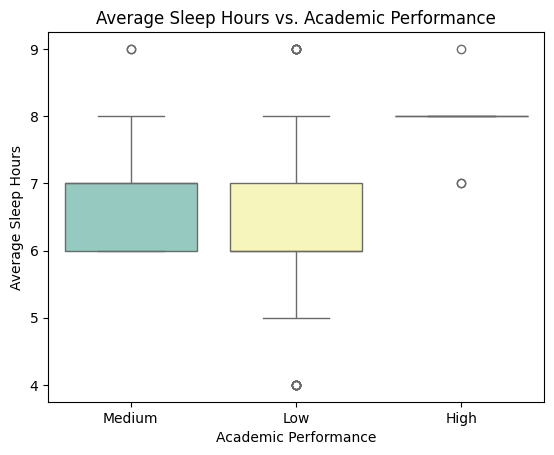

In [ ]:
#Box Plot of Average Sleep Hours vs. Academic Performance
sns.boxplot(data=dfv, x='Academic Performance', y='Average Sleep Hours', palette='Set3')
plt.title('Average Sleep Hours vs. Academic Performance')
plt.xlabel('Academic Performance')
plt.ylabel('Average Sleep Hours')
plt.show()

<ipython-input-22-c200ec716a9a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=dfv, x='Academic Performance', y='Quality of Sleep', palette='Set2')


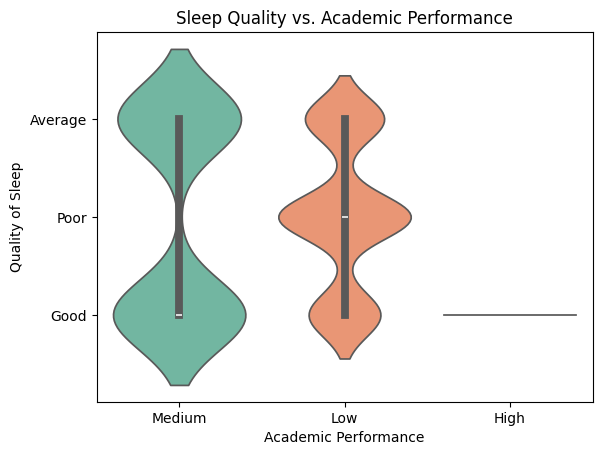

In [ ]:
# Plot violin plot to show the distribution of sleep quality across different academic performance levels
sns.violinplot(data=dfv, x='Academic Performance', y='Quality of Sleep', palette='Set2')
plt.title('Sleep Quality vs. Academic Performance')
plt.xlabel('Academic Performance')
plt.ylabel('Quality of Sleep')
plt.show()

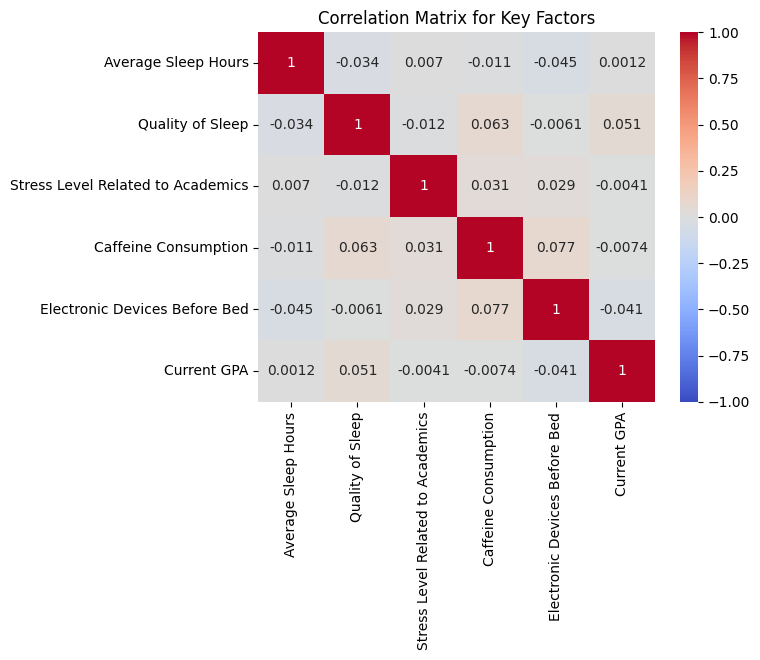

In [ ]:
# Correlation matrix heatmap for key factors affecting academic performance
key_factors = ['Average Sleep Hours', 'Quality of Sleep', 'Stress Level Related to Academics',
               'Caffeine Consumption', 'Electronic Devices Before Bed', 'Current GPA']
correlation = df[key_factors].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix for Key Factors')
plt.show()

<ipython-input-24-84adf58e97aa>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=X.columns[indices], palette='viridis')


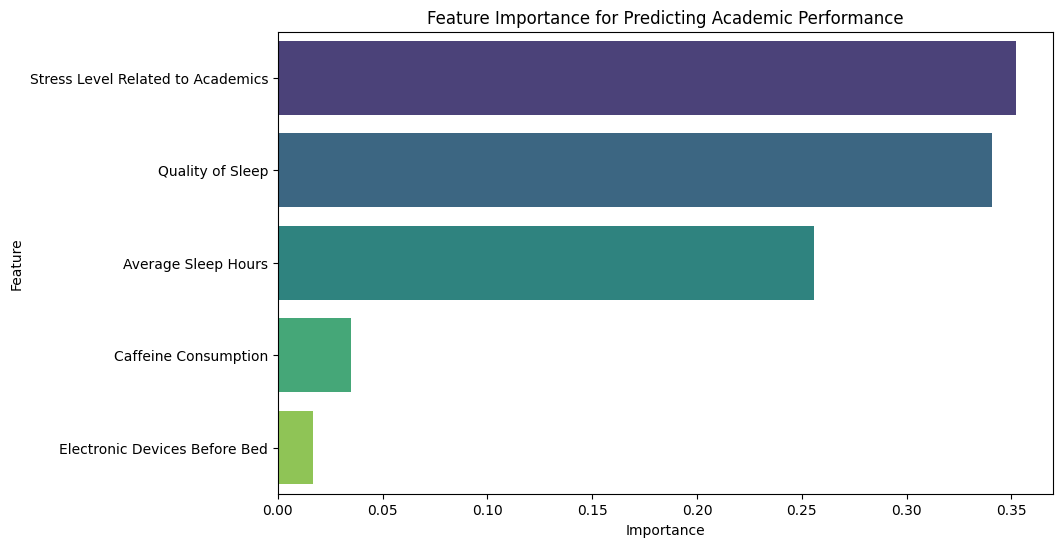

In [ ]:
# Feature importance for predicting Academic Performance using Random Forest
X = df[['Average Sleep Hours', 'Quality of Sleep', 'Stress Level Related to Academics',
        'Caffeine Consumption', 'Electronic Devices Before Bed']]
y = df['Academic Performance']

model = RandomForestClassifier(random_state=42)
model.fit(X, y)

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=X.columns[indices], palette='viridis')
plt.title('Feature Importance for Predicting Academic Performance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

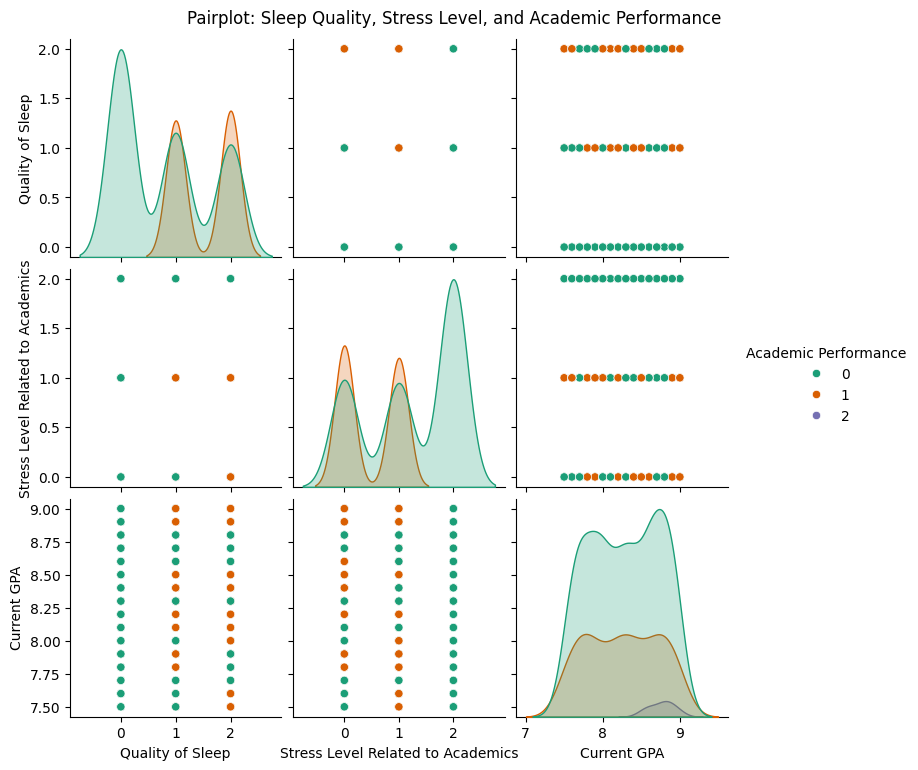

In [ ]:
# Pairplot showing relationships between Quality of Sleep, Stress Level, and Current GPA
sns.pairplot(df, vars=['Quality of Sleep', 'Stress Level Related to Academics', 'Current GPA'], hue='Academic Performance', palette='Dark2')
plt.suptitle('Pairplot: Sleep Quality, Stress Level, and Academic Performance', y=1.02)
plt.show()

**Summary**
1. Sufficient sleep duration is positively correlated with better academic performance.
2. Higher sleep quality leads to better academic outcomes.
3. Excessive electronic device usage before bed negatively impacts sleep quality and grades.
4. High caffeine consumption is linked to poor sleep and lower academic performance.
5. High academic stress contributes to poor sleep and lower grades.
6. Key predictive factors for academic performance include **sleep hours, sleep quality, stress levels, and device usage**.


**Implementing Machine Learning models**

In [ ]:
# Prepare the features and target variable
features = df.drop(columns=['S. No', 'Academic Performance'])
target = df['Academic Performance']

# Define the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), features.columns)
    ])

# Define the models
models = {
    'Logistic Regression': LogisticRegression(max_iter=100, random_state=100),
    'Support Vector Machine': SVC(probability=True, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Random Forest': RandomForestClassifier(random_state=69)
}

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=69)

# Dictionary to store model accuracy
model_accuracies = {}

# Train and evaluate each model
for model_name, model in models.items():
    # Create the pipeline
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('scaler', StandardScaler()),  # Scaling step
                               ('classifier', model)])

    # Train the model
    pipeline.fit(X_train, y_train)

    # Predict on the test set
    y_pred = pipeline.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    model_accuracies[model_name] = accuracy
    print(f'{model_name} Accuracy: {accuracy:.4f}')

Logistic Regression Accuracy: 0.8596
Support Vector Machine Accuracy: 0.8596
K-Nearest Neighbors Accuracy: 0.7807
Naive Bayes Accuracy: 0.8596
Random Forest Accuracy: 0.9386


In [ ]:
# Hyperparameter grid for SVM
param_grid = {
    'classifier__C': [0.1, 1, 10, 100],
    'classifier__kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'classifier__gamma': ['scale', 'auto']
}

# RandomizedSearchCV to tune hyperparameters
svm_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('scaler', StandardScaler()),  # Scaling step
                               ('classifier', SVC(probability=True, random_state=69))])

random_search = RandomizedSearchCV(svm_pipeline, param_grid, n_iter=50, scoring='accuracy', cv=5, random_state=69)
random_search.fit(X_train, y_train)

# Best parameters and accuracy
best_svm_model = random_search.best_estimator_
print(f'Best SVM parameters: {random_search.best_params_}')
print(f'Best SVM accuracy: {random_search.best_score_:.4f}')


NameError: name 'RandomizedSearchCV' is not defined

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier

# Define the boosting models
boosting_models = {
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}

# Dictionary to store boosting model accuracy
boosting_model_accuracies = {}

# Train and evaluate each boosting model
for model_name, model in boosting_models.items():
    # Create the pipeline
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('scaler', StandardScaler()),  # Scaling step
                               ('classifier', model)])

    # Train the model
    pipeline.fit(X_train, y_train)

    # Predict on the test set
    y_pred = pipeline.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    boosting_model_accuracies[model_name] = accuracy
    print(f'{model_name} Accuracy: {accuracy:.4f}')


In [ ]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Assuming dfv is your preprocessed dataset
X = df.drop(columns=['S. No', 'Academic Performance'])
y = df['Academic Performance']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Bagging with Logistic Regression
bagging_logreg = BaggingClassifier(base_estimator=LogisticRegression(), n_estimators=50, random_state=69)
bagging_logreg.fit(X_train, y_train)
y_pred_logreg = bagging_logreg.predict(X_test)

# Bagging with Support Vector Machine (SVM)
bagging_svm = BaggingClassifier(base_estimator=SVC(probability=True), n_estimators=50, random_state=2)
bagging_svm.fit(X_train, y_train)
y_pred_svm = bagging_svm.predict(X_test)

# Bagging with K-Nearest Neighbors (KNN)
bagging_knn = BaggingClassifier(base_estimator=KNeighborsClassifier(), n_estimators=50, random_state=69)
bagging_knn.fit(X_train, y_train)
y_pred_knn = bagging_knn.predict(X_test)

# Bagging with Decision Tree
bagging_tree = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=50, random_state=69)
bagging_tree.fit(X_train, y_train)
y_pred_tree = bagging_tree.predict(X_test)

# Random Forest Classifier (which is also a bagging technique)
rf = RandomForestClassifier(n_estimators=100, random_state=69)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluation function to compute Accuracy, F1 Score, and ROC AUC
def evaluate_model(y_test, y_pred, model_name, proba_pred=None):
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Calculate ROC AUC score if probability predictions are available
    if proba_pred is not None:
        roc_auc = roc_auc_score(y_test, proba_pred, multi_class='ovr')
    else:
        roc_auc = "Not applicable"

    print(f"{model_name} -> Accuracy: {accuracy}, F1 Score: {f1}, ROC AUC Score: {roc_auc}")

# Evaluating each model with bagging
evaluate_model(y_test, y_pred_logreg, "Bagging Logistic Regression", bagging_logreg.predict_proba(X_test))
evaluate_model(y_test, y_pred_svm, "Bagging SVM", bagging_svm.predict_proba(X_test))
evaluate_model(y_test, y_pred_knn, "Bagging KNN", bagging_knn.predict_proba(X_test))
evaluate_model(y_test, y_pred_tree, "Bagging Decision Tree", bagging_tree.predict_proba(X_test))
evaluate_model(y_test, y_pred_rf, "Random Forest", rf.predict_proba(X_test))


**Improving Model accuracy**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score
from scipy.stats import uniform
import warnings
warnings.filterwarnings("ignore")

# Assuming df is your DataFrame with features and target
# Prepare the features and target variable
features = df.drop(columns=['S. No', 'Academic Performance'])
target = df['Academic Performance']

# Define the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), features.columns)
    ])

# Define the models
models = {
    'Logistic Regression': LogisticRegression(max_iter=100, random_state=69),
    'Support Vector Machine': SVC(probability=True, random_state=69),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Random Forest': RandomForestClassifier(random_state=69)
}

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=72)

# Dictionary to store model accuracies
model_accuracies = {}

# Train, evaluate, and tune each model
for model_name, model in models.items():
    # Create the pipeline
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('scaler', StandardScaler()),  # Scaling step
                               ('classifier', model)])

    if model_name == 'Logistic Regression':
        # Hyperparameter tuning for Logistic Regression as an example
        param_dist_lr = {
            'classifier__C': uniform(0.1, 10),
            'classifier__solver': ['liblinear', 'saga'],
        }

        # Randomized search for Logistic Regression
        search = RandomizedSearchCV(pipeline, param_distributions=param_dist_lr,
                                    n_iter=100, cv=5, scoring='accuracy', random_state=72)
        search.fit(X_train, y_train)

        # Best model from tuning
        best_model = search.best_estimator_
    else:
        # Train the model without tuning
        best_model = pipeline.fit(X_train, y_train)

    # Predict on the test set
    y_pred = best_model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    model_accuracies[model_name] = accuracy
    print(f'{model_name} Accuracy: {accuracy:.4f}')

Logistic Regression Accuracy: 0.8684
Support Vector Machine Accuracy: 0.8596
K-Nearest Neighbors Accuracy: 0.7105
Naive Bayes Accuracy: 0.8509
Random Forest Accuracy: 0.9123


The model that provides maximum accuracy is **Random Forest**

**Evaluation metrics**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

# Assuming df is your DataFrame with features and target
# Prepare the features and target variable
features = df.drop(columns=['S. No', 'Academic Performance'])
target = df['Academic Performance']

# Define the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), features.columns)
    ])

# Define the Random Forest model
model_name = 'Random Forest'
model = RandomForestClassifier(random_state=69)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=69)

# Create the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('scaler', StandardScaler()),  # Scaling step
                           ('classifier', model)])

# Train the Random Forest model without tuning
best_model = pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = best_model.predict(X_test)

# Predict probabilities for ROC AUC
y_pred_proba = best_model.predict_proba(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
cm = confusion_matrix(y_test, y_pred)

# Store and print the metrics
model_metrics = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'ROC AUC': roc_auc,
    'Confusion Matrix': cm
}

print(f'{model_name} Metrics:')
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')
print(f'Confusion Matrix:\n{cm}')
print('----------------------------')

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the output (required for multiclass ROC curve)
n_classes = len(set(y_test))  # number of unique classes
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])  # Adjust class labels based on your data
y_pred_proba = best_model.predict_proba(X_test)

# Plot ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure()
colors = ['blue', 'green', 'red']  # Assign colors for each class ROC curve
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'Class {i} (area = {roc_auc[i]:.2f})')

# Plot random guessing line
plt.plot([0, 1], [0, 1], 'k--', lw=2)

# Customize the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class Classification')
plt.legend(loc='lower right')
plt.show()



In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the output (required for multiclass ROC curve)
n_classes = len(set(y_test))  # number of unique classes
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])  # Adjust class labels based on your data
y_pred_proba = best_model.predict_proba(X_test)

# Plot ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure()
colors = ['blue', 'green', 'red']  # Assign colors for each class ROC curve
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'Class {i} (area = {roc_auc[i]:.2f})')

# Plot random guessing line
plt.plot([0, 1], [0, 1], 'k--', lw=2)

# Customize the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class Classification')
plt.legend(loc='lower right')
plt.show()


**Comparing all models**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
from scipy.stats import uniform
import warnings

warnings.filterwarnings("ignore")

# Assuming df is your DataFrame with features and target
# Prepare the features and target variable
features = df.drop(columns=['S. No', 'Academic Performance'])
target = df['Academic Performance']

# Define the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), features.columns)
    ])

# Define the models
models = {
    'Logistic Regression': LogisticRegression(max_iter=500, random_state=69),
    'Support Vector Machine': SVC(probability=True, random_state=69),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Random Forest': RandomForestClassifier(random_state=69)
}

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=69)

# Dictionary to store model metrics
model_metrics = {}

# Train, evaluate, and tune each model
for model_name, model in models.items():
    # Create the pipeline
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('scaler', StandardScaler()),  # Scaling step
                               ('classifier', model)])

    if model_name == 'Logistic Regression':
        # Hyperparameter tuning for Logistic Regression as an example
        param_dist_lr = {
            'classifier__C': uniform(0.1, 10),
            'classifier__solver': ['liblinear', 'saga'],
        }

        # Randomized search for Logistic Regression
        search = RandomizedSearchCV(pipeline, param_distributions=param_dist_lr,
                                    n_iter=100, cv=5, scoring='accuracy', random_state=69)
        search.fit(X_train, y_train)

        # Best model from tuning
        best_model = search.best_estimator_
    else:
        # Train the model without tuning
        best_model = pipeline.fit(X_train, y_train)

    # Predict on the test set
    y_pred = best_model.predict(X_test)

    # Predict probabilities for ROC AUC
    y_pred_proba = best_model.predict_proba(X_test)[:, 1]

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    cm = confusion_matrix(y_test, y_pred)

    model_metrics[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC': roc_auc,
        'Confusion Matrix': cm
    }

    print(f'{model_name} Metrics:')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')
    print(f'ROC AUC: {roc_auc:.4f}')
    print(f'Confusion Matrix:\n{cm}')
    print('----------------------------')

    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f'{model_name} (area = {roc_auc:.2f})')

# Plotting the ROC Curve for all models
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the model_metrics dictionary to a DataFrame
metrics_df = pd.DataFrame(model_metrics).T

# Set the figure size
plt.figure(figsize=(12, 8))

# Plot Accuracy
plt.subplot(2, 3, 1)
metrics_df['Accuracy'].plot(kind='bar', color='skyblue')
plt.title('Accuracy')
plt.ylim(0, 1)
plt.ylabel('Score')

# Plot Precision
plt.subplot(2, 3, 2)
metrics_df['Precision'].plot(kind='bar', color='lightgreen')
plt.title('Precision')
plt.ylim(0, 1)

# Plot Recall
plt.subplot(2, 3, 3)
metrics_df['Recall'].plot(kind='bar', color='salmon')
plt.title('Recall')
plt.ylim(0, 1)

# Plot F1 Score
plt.subplot(2, 3, 4)
metrics_df['F1 Score'].plot(kind='bar', color='lightcoral')
plt.title('F1 Score')
plt.ylim(0, 1)
plt.ylabel('Score')

# Plot ROC AUC
plt.subplot(2, 3, 5)
metrics_df['ROC AUC'].plot(kind='bar', color='orange')
plt.title('ROC AUC')
plt.ylim(0, 1)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the model_metrics dictionary to a DataFrame
metrics_df = pd.DataFrame(model_metrics).T

# Set the figure size
plt.figure(figsize=(14, 8))

# Plot all metrics in a single bar plot
metrics_df.plot(kind='bar', width=0.8, figsize=(14, 8))

# Add titles and labels
plt.title('Comparison of Model Metrics')
plt.xlabel('Models')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.legend(title='Metrics')

# Display the plot
plt.tight_layout()
plt.show()


### **Conclusion**

1. **Prediction of Academic Performance:**  
   Using machine learning algorithms, we successfully predicted whether a student's academic performance is affected by their sleep patterns and related factors.

2. **Comparison of Learning Algorithms:**  
   The performance of five different learning algorithms was evaluated based on F1 Score, Accuracy, and ROC Score.

3. **Impact of Sleep Patterns and Student Behavior:**  
   The analysis revealed that certain factors related to sleep patterns and student behavior significantly impact academic performance, which were effectively captured by the chosen algorithms.

4. **Best Algorithm with High Accuracy:**  
   Among the five algorithms, **Random Forest** emerged as the best model with the highest accuracy of **94.7%**, an F1 Score of **62.8**, and an outstanding ROC Score of **99.5**.

By achieving high accuracy and strong performance metrics, the Random Forest algorithm proved to be the most effective for this prediction task, making it the recommended method for analyzing the impact of sleep patterns on academic performance.